In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Q_learning_df_1 = pd.read_csv("../Data_Generation/Data_files/Q_moves_scores.csv")
Q_learning_df_2 = pd.read_csv("../Data_Generation/Data_files/Q_moves_scores_test.csv")
bfs_df = pd.read_csv("../Data_Generation/Data_files/bfs_heisenberg_data.csv")

In [3]:
all_Q_learning = pd.concat([Q_learning_df_1, Q_learning_df_2])
all_Q_learning = all_Q_learning.drop("last_matrix", axis=1)
all_Q_learning = all_Q_learning.drop_duplicates()

In [4]:
combined_df = pd.merge(all_Q_learning, bfs_df, left_on=["val1", "val2", "val3"], right_on=["val1", "val2", "val3"], how="inner")

In [5]:
print(combined_df.shape)
combined_df.drop_duplicates().shape

(1047, 8)


(1047, 8)

In [6]:
# These Q learning datasets learn a sequence of moves that gets us to the origin 
# as fast as BFS about 97% of the time. 
sum(combined_df['num_moves_Q_learning_needs']==combined_df['num_steps'])/combined_df.shape[0]

0.9828080229226361

In [8]:
sum(combined_df['num_moves_Q_learning_needs']==1+combined_df['num_steps'])/combined_df.shape[0]

0.0

In [9]:
combined_df['last_matrix']

0       2.0
1       0.0
2       1.0
3       0.0
4       2.0
       ... 
1042    2.0
1043    0.0
1044    1.0
1045    3.0
1046    0.0
Name: last_matrix, Length: 1047, dtype: float64

In [10]:
# this swap is necessary because we generate the data in different ways. 
# In Q learning, we are at a matrix and applying matrics on the right to get to the identity
# In BFS, we are at the identity and apply matrics on the right to get to the arbitrary matrix

def swap_ab_and_cd(row):
    if row['last_matrix']==0:
        return 1
    elif row['last_matrix']==1:
        return 0
    elif row['last_matrix']==2:
        return 3
    elif row['last_matrix']==3:
        return 2
    assert 1==2

combined_df['last_matrix_swapping'] = combined_df.apply(swap_ab_and_cd, axis=1)

In [11]:
combined_df

,val1,val2,val3,num_moves_Q_learning_needs,first_move_by_Q_learning,Q_table_val,num_steps,last_matrix,last_matrix_swapping
0,1,-7,-1,10,0,9800.897604,10.0,2.0,3
1,-1,-14,5,10,1,9800.897604,10.0,0.0,1
2,-2,-3,-2,8,0,9840.558881,8.0,1.0,0
3,3,-3,-5,8,1,9840.558881,8.0,0.0,1
4,5,16,3,10,1,9800.894789,10.0,2.0,3
...,...,...,...,...,...,...,...,...,...
1042,4,3,0,6,1,9880.2996,6.0,2.0,3
1043,1,1,-7,10,1,9800.897604,10.0,0.0,1
1044,-4,2,-2,6,0,9880.2996,6.0,1.0,0
1045,3,-10,-3,8,0,9840.558881,8.0,3.0,2


In [12]:
# they agree on the first step 70% of the time. Yay!
sum(combined_df['first_move_by_Q_learning']==combined_df['last_matrix_swapping'])/combined_df.shape[0]

0.6914995224450812

In [13]:
grouped_last_matrices = combined_df.groupby(['first_move_by_Q_learning', 'last_matrix_swapping']).size()

In [15]:
import seaborn as sns

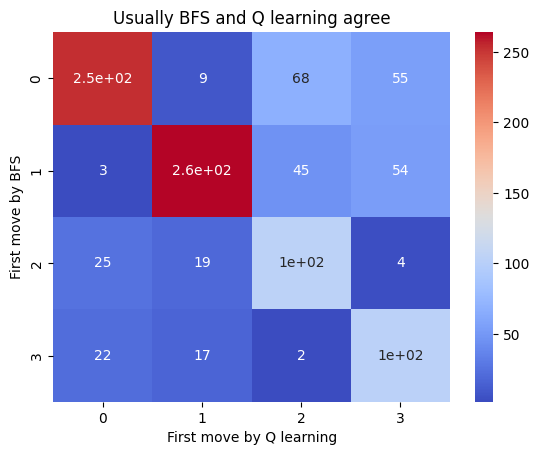

In [23]:
matrix_df = grouped_last_matrices.reset_index(drop=True).to_numpy()
matrix_df = matrix_df.reshape((4, 4))
matrix_df

sns.heatmap(matrix_df, annot=True, cmap='coolwarm')
plt.xlabel("First move by Q learning")
plt.ylabel("First move by BFS")
plt.title("Usually BFS and Q learning agree")
plt.show()